# Greedy K-armed Bandit

In [1]:
# Simple, Non-stationary
import numpy as np
import random

# Number of arms (k-armed bandit)
k = 10
epsilon = 0.1  # exploration rate
steps = 1000   # number of steps to run

# Initialize estimated values and counts
Q = np.zeros(k)   # Q(a): estimated value of action a, Q = array([0,0,0,0,0,0,0,0,0,0]), Q[a] holds the estimated average reward of arm a.
N = np.zeros(k)   # N(a): number of times action a has been selected, N = array([0,0,0,0,0,0,0,0,0,0]), N[a] counts how many times arm a was pulled.

# Simulated bandit with true reward means for each arm
true_means = np.random.normal(0, 1, k)  # unknown to the algorithm, create a array of 10 elements, each element from normal distribution N(0,1)
# array([ 0.05625525, -1.37777665,  1.18099952,  0.54817673,  0.34339132, 0.56317327, -1.55359995, -0.06306481, -0.19473105,  0.56056883])
# true_mean=[No.arm=0, No.arm=1  ,  No.arm=2  ,  No.arm=3  ,  No.arm=4  ,  No.arm=5 ,  No.arm= 6 ,  No.arm=7  ,  No.arm=8  ,  No.arm=9 ]
# true_mean[0]=0.56255

def bandit(a): # bandit(a)= No.a arm's random reward
    """Simulate pulling arm a (return a random reward)"""
    return np.random.normal(true_means[a], 1) # generates a single random number drawn from a normal distribution with true_mean[a],variance=1, np.random.normal(true_means[0],1)=0.7167

# Run ε-greedy bandit algorithm. With probability ε, the algorithm explores a random arm.
for step in range(steps):
    if random.random() < epsilon: # random.random() gives a new uniformly random number in [0,1)
        A = random.randint(0, k - 1)  # explore: random action # random.randint(0,9) return a integer in [0,9]
    else: # a random number > epsilon
        max_value = np.max(Q) # get the max value of Q = array([xx,xx,xx,xx,xx,xx,xx,xx,xx,xx])
        candidates = np.where(Q == max_value)[0] # return the first index of Q==max_value
        A = np.random.choice(candidates)  # break ties randomly

    R = bandit(A)        # get reward
    N[A] += 1            # update count
    Q[A] += (R - Q[A]) / N[A]  # incremental update

# Print final estimated values
for a in range(k):
    print(f"Arm {a}: Estimated value = {Q[a]:.3f}, True mean = {true_means[a]:.3f}, Pulled {int(N[a])} times")

Arm 0: Estimated value = 2.245, True mean = 2.323, Pulled 929 times
Arm 1: Estimated value = -0.646, True mean = -0.138, Pulled 6 times
Arm 2: Estimated value = -0.833, True mean = -0.428, Pulled 8 times
Arm 3: Estimated value = 0.955, True mean = 1.166, Pulled 11 times
Arm 4: Estimated value = -1.987, True mean = -0.984, Pulled 8 times
Arm 5: Estimated value = -0.344, True mean = -0.328, Pulled 8 times
Arm 6: Estimated value = -0.719, True mean = -0.259, Pulled 10 times
Arm 7: Estimated value = 0.234, True mean = -0.179, Pulled 6 times
Arm 8: Estimated value = 0.132, True mean = -0.082, Pulled 4 times
Arm 9: Estimated value = -0.060, True mean = -0.369, Pulled 10 times



Final Results:
Arm 0: Estimated value = 0.178, True mean = 0.497, Pulled 10 times
Arm 1: Estimated value = -0.388, True mean = -0.138, Pulled 8 times
Arm 2: Estimated value = 0.978, True mean = 0.648, Pulled 15 times
Arm 3: Estimated value = 1.566, True mean = 1.523, Pulled 886 times
Arm 4: Estimated value = 0.249, True mean = -0.234, Pulled 10 times
Arm 5: Estimated value = -0.104, True mean = -0.234, Pulled 10 times
Arm 6: Estimated value = 1.347, True mean = 1.579, Pulled 24 times
Arm 7: Estimated value = 1.165, True mean = 0.767, Pulled 21 times
Arm 8: Estimated value = -0.605, True mean = -0.469, Pulled 12 times
Arm 9: Estimated value = 0.118, True mean = 0.543, Pulled 4 times


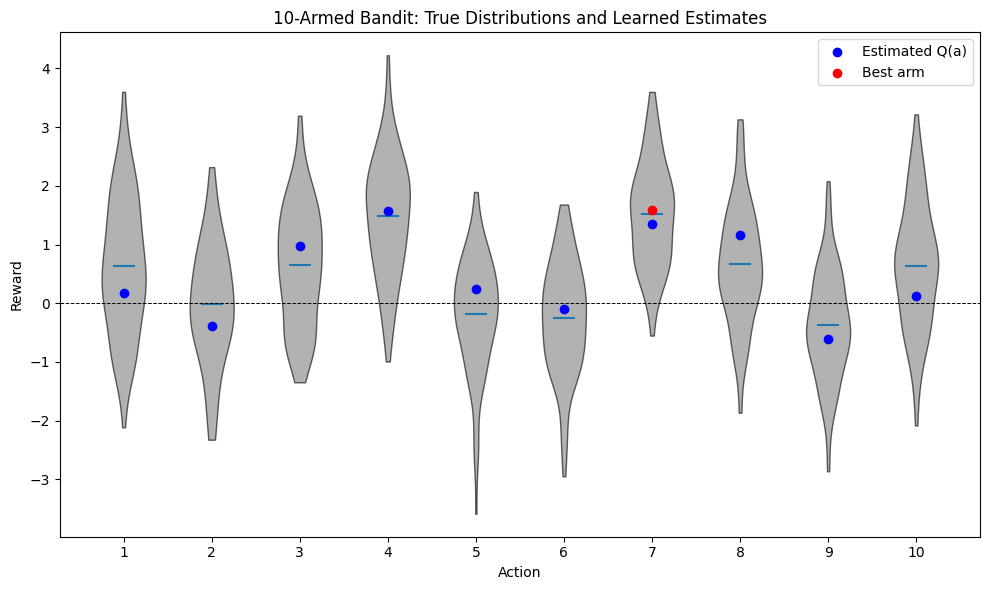

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Parameters
k = 10
epsilon = 0.1
steps = 1000

# Initialize values and counters
Q = np.zeros(k)        # Estimated value of each action
N = np.zeros(k)        # Count of pulls for each action
true_means = np.random.normal(0, 1, k)  # True mean rewards

# Bandit reward function
def bandit(a):
    return np.random.normal(true_means[a], 1)

# Run ε-greedy algorithm
for step in range(steps):
    if random.random() < epsilon:
        A = random.randint(0, k - 1)  # Explore
    else:
        max_value = np.max(Q)
        candidates = np.where(Q == max_value)[0]
        A = np.random.choice(candidates)  # Exploit with tie-breaking

    R = bandit(A)
    N[A] += 1
    Q[A] += (R - Q[A]) / N[A]  # Incremental average update

# Print final estimated values
print("\nFinal Results:")
for a in range(k):
    print(f"Arm {a}: Estimated value = {Q[a]:.3f}, True mean = {true_means[a]:.3f}, Pulled {int(N[a])} times")

# --- Visualization (Figure 2.1-style) ---
# Simulate distributions for violin plot
rewards = [np.random.normal(loc=mu, scale=1, size=100) for mu in true_means]
best_arm = np.argmax(true_means)

plt.figure(figsize=(10, 6))
parts = plt.violinplot(rewards, showmeans=True, showextrema=False, showmedians=False)

# Style violins
for pc in parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)

# Overlay horizontal line at reward = 0
plt.axhline(0, color='k', linestyle='--', linewidth=0.7)

# Overlay estimated Q-values (blue)
plt.scatter(np.arange(1, k + 1), Q, color='blue', label='Estimated Q(a)', zorder=3)

# Mark the best arm (red dot)
plt.scatter(best_arm + 1, true_means[best_arm], color='red', label='Best arm', zorder=4)

# Axis labels and title
plt.xticks(np.arange(1, k + 1))
plt.xlabel('Action')
plt.ylabel('Reward')
plt.title('10-Armed Bandit: True Distributions and Learned Estimates')
plt.legend()
plt.tight_layout()
plt.show()



Final Results:
Arm 0: Estimated value = 0.939, True mean = 0.497, Pulled 24 times
Arm 1: Estimated value = 0.299, True mean = -0.138, Pulled 21 times
Arm 2: Estimated value = 0.397, True mean = 0.648, Pulled 17 times
Arm 3: Estimated value = 1.265, True mean = 1.523, Pulled 35 times
Arm 4: Estimated value = 0.085, True mean = -0.234, Pulled 21 times
Arm 5: Estimated value = -0.223, True mean = -0.234, Pulled 22 times
Arm 6: Estimated value = 1.614, True mean = 1.579, Pulled 809 times
Arm 7: Estimated value = 0.627, True mean = 0.767, Pulled 20 times
Arm 8: Estimated value = -0.541, True mean = -0.469, Pulled 17 times
Arm 9: Estimated value = 0.544, True mean = 0.543, Pulled 14 times


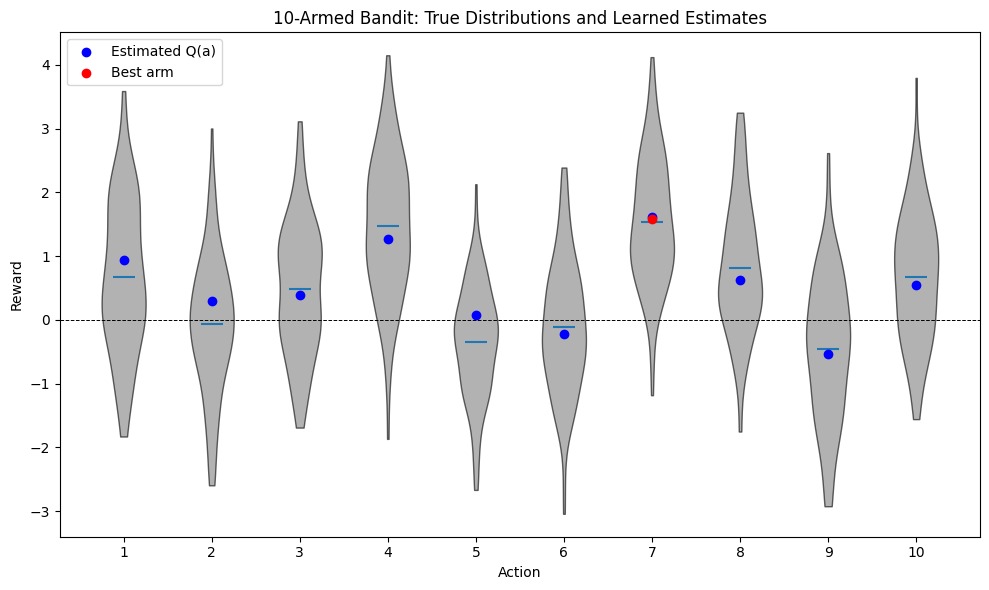

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Parameters
k = 10
epsilon = 0.2
steps = 1000

# Initialize values and counters
Q = np.zeros(k)        # Estimated value of each action
N = np.zeros(k)        # Count of pulls for each action
true_means = np.random.normal(0, 1, k)  # True mean rewards

# Bandit reward function
def bandit(a):
    return np.random.normal(true_means[a], 1)

# Run ε-greedy algorithm
for step in range(steps):
    if random.random() < epsilon:
        A = random.randint(0, k - 1)  # Explore
    else:
        max_value = np.max(Q)
        candidates = np.where(Q == max_value)[0]
        A = np.random.choice(candidates)  # Exploit with tie-breaking

    R = bandit(A)
    N[A] += 1
    Q[A] += (R - Q[A]) / N[A]  # Incremental average update

# Print final estimated values
print("\nFinal Results:")
for a in range(k):
    print(f"Arm {a}: Estimated value = {Q[a]:.3f}, True mean = {true_means[a]:.3f}, Pulled {int(N[a])} times")

# --- Visualization (Figure 2.1-style) ---
# Simulate distributions for violin plot
rewards = [np.random.normal(loc=mu, scale=1, size=100) for mu in true_means]
best_arm = np.argmax(true_means)

plt.figure(figsize=(10, 6))
parts = plt.violinplot(rewards, showmeans=True, showextrema=False, showmedians=False)

# Style violins
for pc in parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)

# Overlay horizontal line at reward = 0
plt.axhline(0, color='k', linestyle='--', linewidth=0.7)

# Overlay estimated Q-values (blue)
plt.scatter(np.arange(1, k + 1), Q, color='blue', label='Estimated Q(a)', zorder=3)

# Mark the best arm (red dot)
plt.scatter(best_arm + 1, true_means[best_arm], color='red', label='Best arm', zorder=4)

# Axis labels and title
plt.xticks(np.arange(1, k + 1))
plt.xlabel('Action')
plt.ylabel('Reward')
plt.title('10-Armed Bandit: True Distributions and Learned Estimates')
plt.legend()
plt.tight_layout()
plt.show()


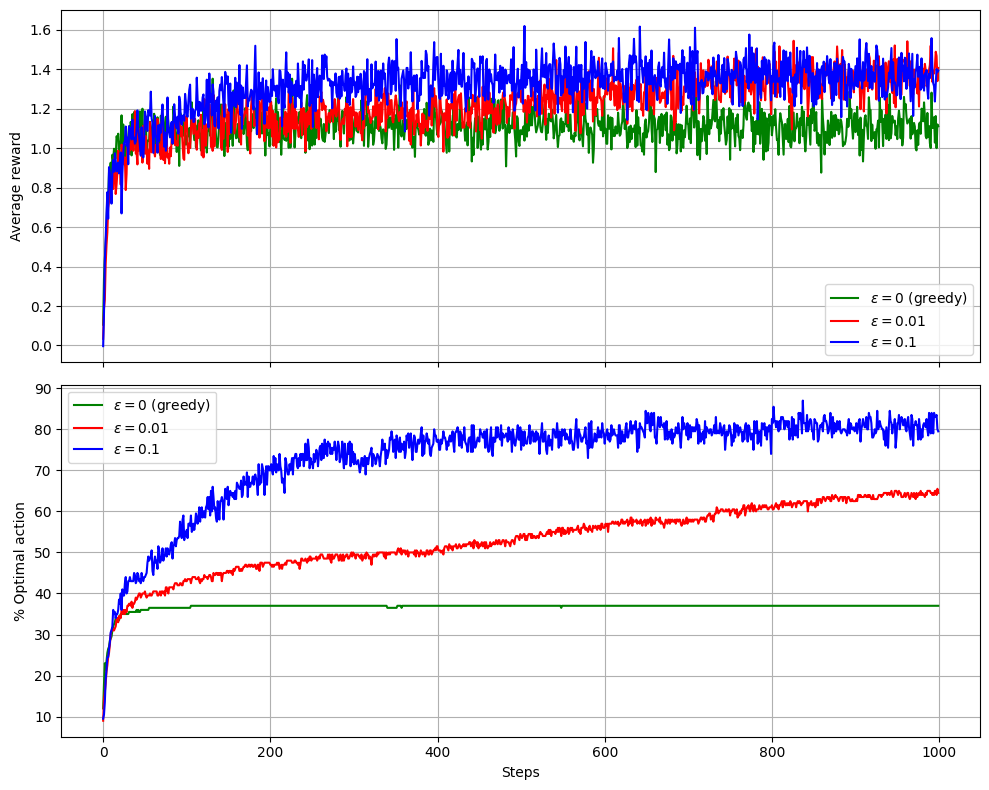

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Set parameters
k = 10             # number of arms
steps = 1000       # number of time steps
runs = 200         # number of runs (use 2000 for full replication)
epsilons = [0, 0.01, 0.1]

# Result storage
avg_rewards = {eps: np.zeros(steps) for eps in epsilons}
optimal_actions = {eps: np.zeros(steps) for eps in epsilons}

# Run experiments
for eps in epsilons:
    for run in range(runs):
        Q = np.zeros(k)
        N = np.zeros(k)
        true_means = np.random.normal(0, 1, k)
        optimal_arm = np.argmax(true_means)

        for step in range(steps):
            if random.random() < eps:
                A = random.randint(0, k - 1)
            else:
                max_value = np.max(Q)
                best_actions = np.where(Q == max_value)[0]
                A = np.random.choice(best_actions)

            reward = np.random.normal(true_means[A], 1)
            N[A] += 1
            Q[A] += (reward - Q[A]) / N[A]

            avg_rewards[eps][step] += reward
            optimal_actions[eps][step] += 1 if A == optimal_arm else 0

# Average results over runs
for eps in epsilons:
    avg_rewards[eps] /= runs
    optimal_actions[eps] = 100 * optimal_actions[eps] / runs

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

colors = {0: 'green', 0.01: 'red', 0.1: 'blue'}
labels = {0: r'$\varepsilon = 0$ (greedy)', 0.01: r'$\varepsilon = 0.01$', 0.1: r'$\varepsilon = 0.1$'}

# Plot average reward
for eps in epsilons:
    ax1.plot(avg_rewards[eps], label=labels[eps], color=colors[eps])
ax1.set_ylabel('Average reward')
ax1.grid(True)
ax1.legend()

# Plot % optimal action
for eps in epsilons:
    ax2.plot(optimal_actions[eps], label=labels[eps], color=colors[eps])
ax2.set_ylabel('% Optimal action')
ax2.set_xlabel('Steps')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


# UCB K-armed Bandits

In [10]:
import numpy as np

# Number of arms (k-armed bandit)
k = 10
steps = 1000   # number of steps to run
c = 2          # UCB exploration parameter

# Initialize estimated values and counts
Q = np.zeros(k)   # Q(a): estimated value of action a
N = np.zeros(k)   # N(a): number of times action a has been selected

# Simulated bandit with true reward means for each arm
true_means = np.random.normal(0, 1, k)  # unknown to the algorithm

def bandit(a):
    """Simulate pulling arm a (return a random reward)"""
    return np.random.normal(true_means[a], 1)

# Run UCB bandit algorithm
for step in range(steps):
    ucb_values = np.zeros(k) # [0,0,0,0,0,0,0,0,0,0]
    for a in range(k):
        if N[a] == 0:
            ucb_values[a] = float('inf')  # force exploration, forces the algorithm to explore any action that has not been tried yet — that is, when N(a)=0.
        else:
            ucb_values[a] = Q[a] + c * np.sqrt(np.log(step + 1) / N[a])

    A = np.argmax(ucb_values)  # select action with max UCB

    R = bandit(A)        # get reward
    N[A] += 1            # update count
    Q[A] += (R - Q[A]) / N[A]  # incremental update (sample average)

# Print final estimated values
for a in range(k):
    print(f"Arm {a}: Estimated value = {Q[a]:.3f}, True mean = {true_means[a]:.3f}, Pulled {int(N[a])} times")

Arm 0: Estimated value = -3.115, True mean = -2.208, Pulled 1 times
Arm 1: Estimated value = 2.454, True mean = 2.422, Pulled 953 times
Arm 2: Estimated value = 0.278, True mean = 0.858, Pulled 8 times
Arm 3: Estimated value = -0.384, True mean = -0.174, Pulled 4 times
Arm 4: Estimated value = -0.522, True mean = -0.552, Pulled 3 times
Arm 5: Estimated value = -1.308, True mean = -0.866, Pulled 2 times
Arm 6: Estimated value = 0.540, True mean = 0.646, Pulled 7 times
Arm 7: Estimated value = 0.459, True mean = 0.995, Pulled 6 times
Arm 8: Estimated value = 0.016, True mean = -0.163, Pulled 6 times
Arm 9: Estimated value = 0.928, True mean = 1.107, Pulled 10 times



Final Results (UCB1):
Arm 0: Estimated value = 0.551, True mean = 0.497, Pulled 17 times
Arm 1: Estimated value = -0.338, True mean = -0.138, Pulled 8 times
Arm 2: Estimated value = 0.524, True mean = 0.648, Pulled 17 times
Arm 3: Estimated value = 1.493, True mean = 1.523, Pulled 248 times
Arm 4: Estimated value = -0.928, True mean = -0.234, Pulled 5 times
Arm 5: Estimated value = -0.566, True mean = -0.234, Pulled 5 times
Arm 6: Estimated value = 1.635, True mean = 1.579, Pulled 651 times
Arm 7: Estimated value = 0.871, True mean = 0.767, Pulled 32 times
Arm 8: Estimated value = -0.646, True mean = -0.469, Pulled 5 times
Arm 9: Estimated value = 0.220, True mean = 0.543, Pulled 12 times


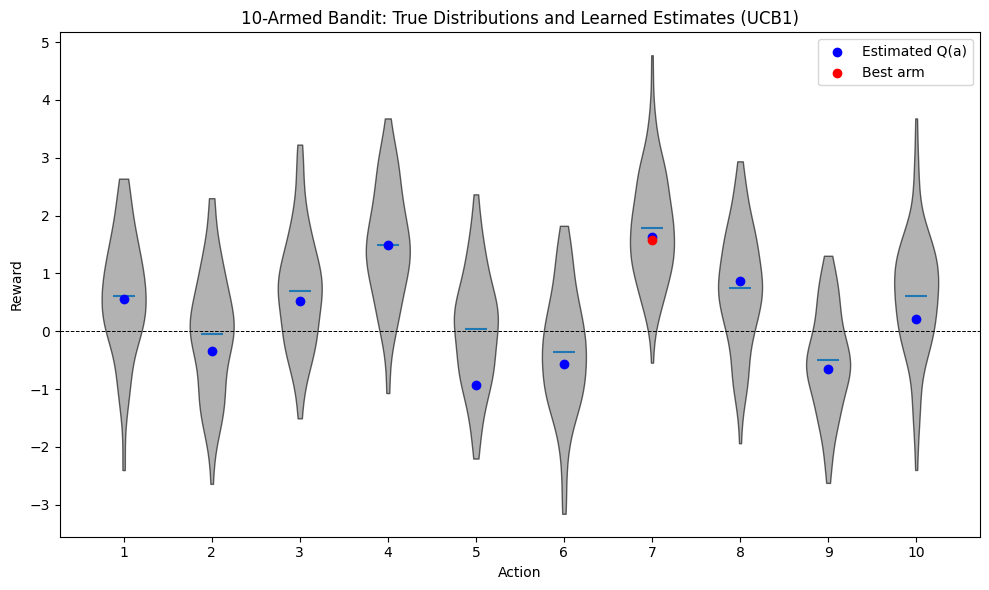

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# --- Parameters ---
k = 10
steps = 1000
c = 2  # UCB exploration constant

# --- Initialization ---
Q = np.zeros(k)              # Estimated values
N = np.zeros(k)              # Pull counts
true_means = np.random.normal(0, 1, k)  # True mean rewards (unknown)

# --- Bandit reward function ---
def bandit(a):
    return np.random.normal(true_means[a], 1)

# --- UCB1 Algorithm ---
for step in range(steps):
    ucb_values = np.zeros(k)
    for a in range(k):
        if N[a] == 0:
            ucb_values[a] = float('inf')  # Force initial exploration
        else:
            ucb_values[a] = Q[a] + c * np.sqrt(np.log(step + 1) / N[a])

    A = np.argmax(ucb_values)
    R = bandit(A)
    N[A] += 1
    Q[A] += (R - Q[A]) / N[A]  # Incremental update

# --- Print final estimated values ---
print("\nFinal Results (UCB1):")
for a in range(k):
    print(f"Arm {a}: Estimated value = {Q[a]:.3f}, True mean = {true_means[a]:.3f}, Pulled {int(N[a])} times")

# --- Visualization: Figure 2.1-style violin plot ---
# Simulate reward distributions for violin plot
rewards = [np.random.normal(loc=mu, scale=1, size=100) for mu in true_means]
best_arm = np.argmax(true_means)

plt.figure(figsize=(10, 6))
parts = plt.violinplot(rewards, showmeans=True, showextrema=False, showmedians=False)

# Style violins
for pc in parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)

# Add horizontal baseline
plt.axhline(0, color='k', linestyle='--', linewidth=0.7)

# Overlay estimated Q values (blue)
plt.scatter(np.arange(1, k + 1), Q, color='blue', label='Estimated Q(a)', zorder=3)

# Mark the best arm (red dot)
plt.scatter(best_arm + 1, true_means[best_arm], color='red', label='Best arm', zorder=4)

# Labels and layout
plt.xticks(np.arange(1, k + 1))
plt.xlabel('Action')
plt.ylabel('Reward')
plt.title('10-Armed Bandit: True Distributions and Learned Estimates (UCB1)')
plt.legend()
plt.tight_layout()
plt.show()


# Gradient Bandit Algorithms

In [14]:
import numpy as np

# Number of arms
k = 10
steps = 1000

# Learning rate (step-size parameter)
alpha = 0.1

# Initialize preferences and average reward
H = np.zeros(k)           # H(a): preference for each action
pi = np.ones(k) / k       # initial action probabilities (uniform)
average_reward = 0        # baseline for reward normalization

# Track how many times each arm was chosen
N = np.zeros(k)

# Simulated true reward values for each arm
true_means = np.random.normal(0, 1, k)

def bandit(a):
    """Return a reward from the true distribution of arm a"""
    return np.random.normal(true_means[a], 1)

# Run gradient bandit algorithm
for step in range(1, steps + 1):
    # Compute softmax probabilities
    exp_H = np.exp(H - np.max(H))  # numerical stability
    pi = exp_H / np.sum(exp_H)

    # Select action according to probabilities
    A = np.random.choice(np.arange(k), p=pi) # Creates an array [0, 1, 2, ..., k-1]

    # Get reward
    R = bandit(A)

    # Update baseline reward (incremental average)
    average_reward += (R - average_reward) / step

    # Update preferences
    for a in range(k):
        if a == A:
            H[a] += alpha * (R - average_reward) * (1 - pi[a])
        else:
            H[a] -= alpha * (R - average_reward) * pi[a]

    N[A] += 1  # track action count

# Print results
for a in range(k):
    print(f"Arm {a}: Estimated preference = {H[a]:.3f}, "
          f"Probability = {pi[a]:.3f}, "
          f"True mean = {true_means[a]:.3f}, "
          f"Pulled {int(N[a])} times")

Arm 0: Estimated preference = -1.338, Probability = 0.001, True mean = -0.117, Pulled 10 times
Arm 1: Estimated preference = -1.286, Probability = 0.001, True mean = -0.636, Pulled 8 times
Arm 2: Estimated preference = 3.065, Probability = 0.041, True mean = 1.739, Pulled 204 times
Arm 3: Estimated preference = -1.654, Probability = 0.000, True mean = -0.321, Pulled 11 times
Arm 4: Estimated preference = 6.203, Probability = 0.954, True mean = 1.833, Pulled 713 times
Arm 5: Estimated preference = -0.508, Probability = 0.001, True mean = 0.814, Pulled 13 times
Arm 6: Estimated preference = -0.988, Probability = 0.001, True mean = 0.482, Pulled 15 times
Arm 7: Estimated preference = -0.769, Probability = 0.001, True mean = 0.369, Pulled 7 times
Arm 8: Estimated preference = -0.949, Probability = 0.001, True mean = 0.394, Pulled 14 times
Arm 9: Estimated preference = -1.776, Probability = 0.000, True mean = -1.928, Pulled 5 times



Final Results (Gradient Bandit):
Arm 0: Estimated preference = -0.573, Probability = 0.002, True mean = 0.497, Pulled 22 times
Arm 1: Estimated preference = -0.806, Probability = 0.002, True mean = -0.138, Pulled 14 times
Arm 2: Estimated preference = -0.160, Probability = 0.004, True mean = 0.648, Pulled 26 times
Arm 3: Estimated preference = 1.772, Probability = 0.026, True mean = 1.523, Pulled 44 times
Arm 4: Estimated preference = -1.191, Probability = 0.001, True mean = -0.234, Pulled 11 times
Arm 5: Estimated preference = -1.651, Probability = 0.001, True mean = -0.234, Pulled 12 times
Arm 6: Estimated preference = 5.394, Probability = 0.959, True mean = 1.579, Pulled 834 times
Arm 7: Estimated preference = -0.871, Probability = 0.002, True mean = 0.767, Pulled 13 times
Arm 8: Estimated preference = -1.231, Probability = 0.001, True mean = -0.469, Pulled 7 times
Arm 9: Estimated preference = -0.683, Probability = 0.002, True mean = 0.543, Pulled 17 times


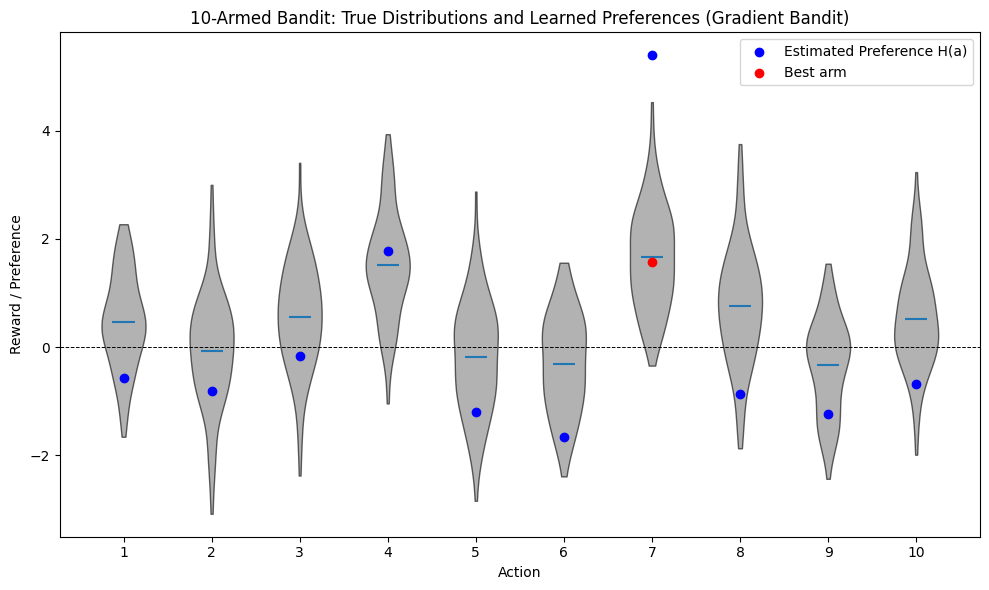

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
np.random.seed(42)
k = 10
steps = 1000
alpha = 0.1  # Learning rate

# --- Initialization ---
H = np.zeros(k)              # Preferences
pi = np.ones(k) / k          # Initial action probabilities
average_reward = 0           # Baseline
N = np.zeros(k)              # Pull counts
true_means = np.random.normal(0, 1, k)  # True reward means (hidden)

# --- Bandit reward function ---
def bandit(a):
    return np.random.normal(true_means[a], 1)

# --- Gradient Bandit Algorithm ---
for step in range(1, steps + 1):
    exp_H = np.exp(H - np.max(H))  # For numerical stability
    pi = exp_H / np.sum(exp_H)     # Softmax probabilities
    A = np.random.choice(np.arange(k), p=pi)
    R = bandit(A)
    average_reward += (R - average_reward) / step  # Update baseline

    # Update preferences
    for a in range(k):
        if a == A:
            H[a] += alpha * (R - average_reward) * (1 - pi[a])
        else:
            H[a] -= alpha * (R - average_reward) * pi[a]

    N[A] += 1

# --- Print final results ---
print("\nFinal Results (Gradient Bandit):")
for a in range(k):
    print(f"Arm {a}: Estimated preference = {H[a]:.3f}, "
          f"Probability = {pi[a]:.3f}, "
          f"True mean = {true_means[a]:.3f}, "
          f"Pulled {int(N[a])} times")

# --- Visualization: Figure 2.1-style ---
# Simulate reward distributions for violin plot
rewards = [np.random.normal(loc=mu, scale=1, size=100) for mu in true_means]
best_arm = np.argmax(true_means)

plt.figure(figsize=(10, 6))
parts = plt.violinplot(rewards, showmeans=True, showextrema=False, showmedians=False)

# Style violins
for pc in parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
    pc.set_alpha(0.6)

# Horizontal reference line
plt.axhline(0, color='k', linestyle='--', linewidth=0.7)

# Plot estimated preferences H(a) and true best arm
plt.scatter(np.arange(1, k + 1), H, color='blue', label='Estimated Preference H(a)', zorder=3)
plt.scatter(best_arm + 1, true_means[best_arm], color='red', label='Best arm', zorder=4)

# Labels and layout
plt.xticks(np.arange(1, k + 1))
plt.xlabel('Action')
plt.ylabel('Reward / Preference')
plt.title('10-Armed Bandit: True Distributions and Learned Preferences (Gradient Bandit)')
plt.legend()
plt.tight_layout()
plt.show()


# Associative Search (Contextual Bandits)

In [15]:
import numpy as np

# Step 1: Setup
steps = 10000
alpha = 0.1
# contexts = ['A', 'B']
# actions = [0, 1]
# #True rewards for each context (hard-coded)
# true_values = {
#     'A': [10, 20],  # action 1 is better
#     'B': [90, 80]   # action 0 is better
# }

# contexts = ['rainy', 'sunny', 'snowy']
# actions = ['car', 'bike', 'drone']
# true_values = {
#     'rainy': [5, 2, 3],
#     'sunny': [3, 5, 4],
#     'snowy': [2, 1, 6]
# }
contexts = [0, 1, 2]  # 0: rainy, 1: sunny, 2: snowy
actions = [0, 1, 2]   # 0: car, 1: bike, 2: drone
true_values = {
    0: [5, 2, 3],  # rainy
    1: [3, 5, 4],  # sunny
    2: [2, 1, 6]   # snowy
}




# Step 2: Generate random context (50% chance)
def generate_context():
    return np.random.choice(contexts) # randomly return 'A' or 'B'

# Step 3: Simulate reward based on action and context
def get_reward(context, action): # get_reward('A',1)
    mean = true_values[context][action] # true_value['A'][1]=20
    return np.random.normal(loc=mean, scale=1.0) # return a random number from N(mean,1) # Add noise

# Step 4: Initialize learning variables
H = {ctx: np.zeros(len(actions)) for ctx in contexts}  # Preferences
# H= {
#   'A': array([0., 0.]),
#   'B': array([0., 0.])
#    }

average_reward = {ctx: 0.0 for ctx in contexts}        # Baselines
# average_reward= {
#                   'A': 0.0,
#                   'B': 0.0
#                 }
# (R - average_reward[context]) subtract a baseline reward when updating preferences

counts = {ctx: 0 for ctx in contexts}                  # Steps per context
# counts= {
#           'A': 0,
#           'B': 0
#         }
# counts[context] += 1
# average_reward[context] += (reward - average_reward[context]) / counts[context]


# Step 5: Run gradient bandit
for t in range(1, steps + 1):
    context = generate_context()
    counts[context] += 1

    # Softmax over preferences
    exp_H = np.exp(H[context] - np.max(H[context]))  # for numerical stability
    pi = exp_H / np.sum(exp_H)  # Probabilities for each action

    # Select action based on probabilities
    action = np.random.choice(actions, p=pi)

    # Get reward from environment
    reward = get_reward(context, action)

    # Update baseline average reward
    average_reward[context] += (reward - average_reward[context]) / counts[context]

    # Update preferences using gradient ascent
    for a in actions:
        if a == action:
            H[context][a] += alpha * (reward - average_reward[context]) * (1 - pi[a])
        else:
            H[context][a] -= alpha * (reward - average_reward[context]) * pi[a]

# Step 6: Final Report
for ctx in contexts:
    print(f"\nContext: {ctx}")
    for a in actions:
        print(f"  Action {a}: Preference = {H[ctx][a]:.3f}, True Value = {true_values[ctx][a]}")



Context: 0
  Action 0: Preference = 5.300, True Value = 5
  Action 1: Preference = -2.769, True Value = 2
  Action 2: Preference = -2.531, True Value = 3

Context: 1
  Action 0: Preference = -2.805, True Value = 3
  Action 1: Preference = 4.841, True Value = 5
  Action 2: Preference = -2.036, True Value = 4

Context: 2
  Action 0: Preference = -2.807, True Value = 2
  Action 1: Preference = -2.506, True Value = 1
  Action 2: Preference = 5.313, True Value = 6


# Thompson Sampling

In [17]:
import numpy as np

class ThompsonSampling:
    def __init__(self, n_arms):
        self.n_arms = n_arms  # n=10
        self.alpha = np.ones(n_arms)  # Successes, array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
        self.beta = np.ones(n_arms)   # Failures, array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

    def select_arm(self):
        samples = np.random.beta(self.alpha, self.beta) # generates a random sample from a Beta distribution with parameters 𝛼 and 𝛽
        return np.argmax(samples)

    def update(self, chosen_arm, reward):
        if reward == 1:
            self.alpha[chosen_arm] += 1
        else:
            self.beta[chosen_arm] += 1


# ---- Simulation ----
ts = ThompsonSampling(n_arms=2)

for t in range(10):
    arm = ts.select_arm()
    reward = np.random.binomial(1, 0.7 if arm == 0 else 0.3)
    ts.update(arm, reward)

    print(f"Step {t+1}:")
    print(f"  Chosen arm: {arm}")
    print(f"  Reward: {reward}")
    print(f"  Alpha: {ts.alpha}")
    print(f"  Beta: {ts.beta}")
    print("-" * 30)

Step 1:
  Chosen arm: 0
  Reward: 1
  Alpha: [2. 1.]
  Beta: [1. 1.]
------------------------------
Step 2:
  Chosen arm: 0
  Reward: 1
  Alpha: [3. 1.]
  Beta: [1. 1.]
------------------------------
Step 3:
  Chosen arm: 0
  Reward: 0
  Alpha: [3. 1.]
  Beta: [2. 1.]
------------------------------
Step 4:
  Chosen arm: 0
  Reward: 0
  Alpha: [3. 1.]
  Beta: [3. 1.]
------------------------------
Step 5:
  Chosen arm: 0
  Reward: 1
  Alpha: [4. 1.]
  Beta: [3. 1.]
------------------------------
Step 6:
  Chosen arm: 0
  Reward: 0
  Alpha: [4. 1.]
  Beta: [4. 1.]
------------------------------
Step 7:
  Chosen arm: 0
  Reward: 1
  Alpha: [5. 1.]
  Beta: [4. 1.]
------------------------------
Step 8:
  Chosen arm: 0
  Reward: 1
  Alpha: [6. 1.]
  Beta: [4. 1.]
------------------------------
Step 9:
  Chosen arm: 1
  Reward: 1
  Alpha: [6. 2.]
  Beta: [4. 1.]
------------------------------
Step 10:
  Chosen arm: 1
  Reward: 0
  Alpha: [6. 2.]
  Beta: [4. 2.]
------------------------------

# Gridworld

In [18]:
import numpy as np

class GridworldEnv:
    def __init__(self, height=5, width=5):
        self.height = height
        self.width = width
        self.action_space = [0, 1, 2, 3]  # 0: Up, 1: Down, 2: Left, 3: Right
        self.A = (0, 1)
        self.A_prime = (4, 1)
        self.B = (0, 3)
        self.B_prime = (2, 3)

    def step(self, state, action):
        i, j = state

        # Special teleportation states
        if state == self.A:
            return self.A_prime, 10
        elif state == self.B:
            return self.B_prime, 5

        # Action to direction mapping
        directions = {
            0: (-1, 0),  # Up
            1: (1, 0),   # Down
            2: (0, -1),  # Left
            3: (0, 1)    # Right
        }

        di, dj = directions[action]
        ni, nj = i + di, j + dj

        # Check boundary conditions
        if 0 <= ni < self.height and 0 <= nj < self.width:
            return (ni, nj), 0
        else:
            return (i, j), -1

    def get_all_states(self):
        return [(i, j) for i in range(self.height) for j in range(self.width)]

    def get_available_actions(self, state):
        return self.action_space


In [20]:
env = GridworldEnv()

print("From A:", env.step(env.A, 0))          # Expected: ((4, 1), 10)
print("From B:", env.step(env.B, 1))          # Expected: ((2, 3), 5)
print("From (0, 0) going up:", env.step((0, 0), 0))  # Expected: ((0, 0), -1)
print("From (2, 2) going right:", env.step((2, 2), 3))  # Expected: ((2, 3), 0)


From A: ((4, 1), 10)
From B: ((2, 3), 5)
From (0, 0) going up: ((0, 0), -1)
From (2, 2) going right: ((2, 3), 0)


In [19]:
import numpy as np

# Define the Gridworld
grid_size = 4
states = [(i, j) for i in range(grid_size) for j in range(grid_size)]
actions = ['U', 'D', 'L', 'R']  # Up, Down, Left, Right
gamma = 1.0
theta = 1e-4  # Convergence threshold

# Transition dynamics
def step(state, action):
    i, j = state
    if state == (0, 0) or state == (3, 3):
        return state, 0  # Terminal state

    if action == 'U':
        i = max(i - 1, 0)
    elif action == 'D':
        i = min(i + 1, grid_size - 1)
    elif action == 'L':
        j = max(j - 1, 0)
    elif action == 'R':
        j = min(j + 1, grid_size - 1)

    return (i, j), -1

# Initialize value function
V = np.zeros((grid_size, grid_size))

# Iterative Policy Evaluation
iteration = 0
while True:
    delta = 0
    for i in range(grid_size):
        for j in range(grid_size):
            state = (i, j)
            if state == (0, 0) or state == (3, 3):
                continue  # Skip terminal states

            v = V[i, j]
            new_v = 0
            for action in actions:
                next_state, reward = step(state, action)
                ni, nj = next_state
                new_v += 0.25 * (reward + gamma * V[ni, nj])  # uniform policy

            V[i, j] = new_v
            delta = max(delta, abs(v - new_v))
    iteration += 1
    if delta < theta:
        break

# Print the final value function
print(f"Converged in {iteration} iterations.\n")
print("Optimal state values under uniform policy:\n")
for row in V:
    print(["{:+.2f}".format(val) for val in row])


Converged in 114 iterations.

Optimal state values under uniform policy:

['+0.00', '-14.00', '-20.00', '-22.00']
['-14.00', '-18.00', '-20.00', '-20.00']
['-20.00', '-20.00', '-18.00', '-14.00']
['-22.00', '-20.00', '-14.00', '+0.00']
